In [1]:
import numpy as np 
import pandas as pd 
import os 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [2]:
df =pd.read_csv("C:\\Users\\RAMAKRISHNA J\\Desktop\\AI-ML\\PRJ Stock Price Prediction-20240806T171454Z-001 (1)\\PRJ Stock Price Prediction\\prices.csv", header=0)
display (df)

,date,symbol,open,close,low,high,volume
0,2016-01-05 00:00:00,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06 00:00:00,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07 00:00:00,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08 00:00:00,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11 00:00:00,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0
...,...,...,...,...,...,...,...
851259,2016-12-30,ZBH,103.309998,103.199997,102.849998,103.930000,973800.0
851260,2016-12-30,ZION,43.070000,43.040001,42.689999,43.310001,1938100.0
851261,2016-12-30,ZTS,53.639999,53.529999,53.270000,53.740002,1701200.0
851262,2016-12-30 00:00:00,AIV,44.730000,45.450001,44.410000,45.590000,1380900.0


In [3]:
#Display the shape 
print(df.shape)

(851264, 7)


In [4]:
#Display the column names
print(df.columns)

Index(['date', 'symbol', 'open', 'close', 'low', 'high', 'volume'], dtype='object')


In [5]:
#Value count (Number of records by company)
df.symbol.value_counts()

symbol
KSU     1762
NOC     1762
ORCL    1762
OMC     1762
OKE     1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: count, Length: 501, dtype: int64

In [6]:
#Unique Values 
df.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [7]:
#Number of Unique Values 
display(df.symbol.unique().shape)

(501,)

In [8]:
#First 20 Unique values 
df.symbol.unique()[0:20]

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN'], dtype=object)

In [9]:
#Number of Records 
print(len(df.symbol.values))

851264


In [10]:
#Display Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 851264 entries, 0 to 851263
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    851264 non-null  object 
 1   symbol  851264 non-null  object 
 2   open    851264 non-null  float64
 3   close   851264 non-null  float64
 4   low     851264 non-null  float64
 5   high    851264 non-null  float64
 6   volume  851264 non-null  float64
dtypes: float64(5), object(2)
memory usage: 45.5+ MB


In [11]:
#Describe the column 
# Gives the details of each column of the dataset like mean, max, etc
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,70.836986,70.857109,70.118414,71.543476,5.415113e+06
std,83.695876,83.689686,82.877294,84.465504,1.249468e+07
min,0.850000,0.860000,0.830000,0.880000,0.000000e+00
25%,33.840000,33.849998,33.480000,34.189999,1.221500e+06
50%,52.770000,52.799999,52.230000,53.310001,2.476250e+06
75%,79.879997,79.889999,79.110001,80.610001,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [12]:
#Check for NULL Values 
# checking whether there is any null value in the dataset
# .sum() will give the total no. of null value column-wise

df.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [13]:
#Get all Unique Dates 
df.date.unique()

array(['2016-01-05 00:00:00', '2016-01-06 00:00:00',
       '2016-01-07 00:00:00', ..., '2016-12-28', '2016-12-29',
       '2016-12-30'], dtype=object)

In [14]:
#Display Date as  Data Frame
pd.DataFrame(df.date.unique())

,0
0,2016-01-05 00:00:00
1,2016-01-06 00:00:00
2,2016-01-07 00:00:00
3,2016-01-08 00:00:00
4,2016-01-11 00:00:00
...,...
3519,2016-12-23
3520,2016-12-27
3521,2016-12-28
3522,2016-12-29


In [15]:
#Check for Duplicate Records 
df.duplicated().sum()

0

In [16]:
#Load the File 
#Calling the file in nyse named securities.csv, It has the company details 
comp_info = pd.read_csv('C:\\Users\\RAMAKRISHNA J\\Desktop\\AI-ML\\PRJ Stock Price Prediction-20240806T171454Z-001 (1)\\PRJ Stock Price Prediction\\securities.csv')
comp_info

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
...,...,...,...,...,...,...,...,...
500,YHOO,Yahoo Inc.,reports,Information Technology,Internet Software & Services,"Sunnyvale, California",NaN,1011006
501,YUM,Yum! Brands Inc,reports,Consumer Discretionary,Restaurants,"Louisville, Kentucky",06-10-1997,1041061
502,ZBH,Zimmer Biomet Holdings,reports,Health Care,Health Care Equipment,"Warsaw, Indiana",NaN,1136869
503,ZION,Zions Bancorp,reports,Financials,Regional Banks,"Salt Lake City, Utah",NaN,109380


In [17]:
#Check for Unique count 
comp_info["Ticker symbol"].nunique()

505

In [18]:
#Check for info  
comp_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Ticker symbol            505 non-null    object
 1   Security                 505 non-null    object
 2   SEC filings              505 non-null    object
 3   GICS Sector              505 non-null    object
 4   GICS Sub Industry        505 non-null    object
 5   Address of Headquarters  505 non-null    object
 6   Date first added         307 non-null    object
 7   CIK                      505 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [19]:
#Check for Null Values 
comp_info.isnull().sum()

Ticker symbol                0
Security                     0
SEC filings                  0
GICS Sector                  0
GICS Sub Industry            0
Address of Headquarters      0
Date first added           198
CIK                          0
dtype: int64

In [20]:
#Describe the Details 
comp_info.describe()

,CIK
count,5.050000e+02
mean,7.074490e+05
std,5.144375e+05
min,1.800000e+03
25%,8.631200e+04
50%,8.310010e+05
75%,1.075531e+06
max,1.659166e+06


In [21]:
#Search for Particular company details 
# for locating specific data here.... in security column of string that starts with "Face"
comp_info.loc[comp_info.Security.str.startswith('Face') , :]

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
181,FB,Facebook,reports,Information Technology,Internet Software & Services,"Menlo Park, California",23-12-2013,1326801


In [22]:
#Example – Search for another company - Acc
comp_info.loc[comp_info.Security.str.startswith('Acc') , :]
'''Select any 6 companies using the above method for visualizations on respective opening and closing stock prices. 
•	Yahoo Inc,
•	Xerox Corp, 
•	Microsoft Corp
•	Facebook 
•	Adobe Systems Inc 
•	Goldman Sachs Group'''

# here we locate Ticker symbol of company with security like Yahoo, Xerox, Adobe etc, then taking their no. of times entry and thier "Ticker symbol"
#In the result, left side 6.181,212 etc the index values corresponds to the selected companies from  comp info 

comp_plot = comp_info.loc[(comp_info["Security"] == 'Yahoo Inc.') | (comp_info["Security"] == 'Xerox Corp.') | (comp_info["Security"] == 'Adobe Systems Inc')
              | (comp_info["Security"] == 'Microsoft Corp.') | (comp_info["Security"] == 'Adobe Systems Inc') 
              | (comp_info["Security"] == 'Facebook') | (comp_info["Security"] == 'Goldman Sachs Group') , ["Ticker symbol"] ]["Ticker symbol"] 
print(comp_plot)
#For Loop to display 6 Company names 
for i in comp_plot:
    print (i)


6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker symbol, dtype: object
ADBE
FB
GS
MSFT
XRX
YHOO


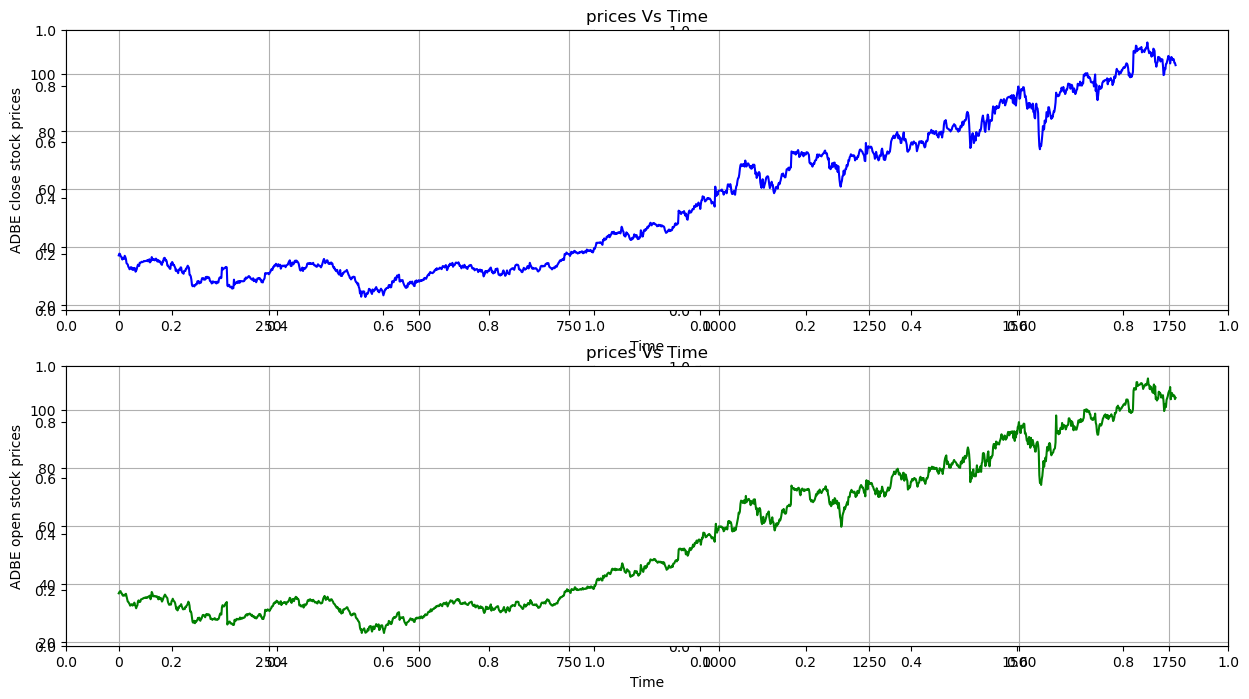

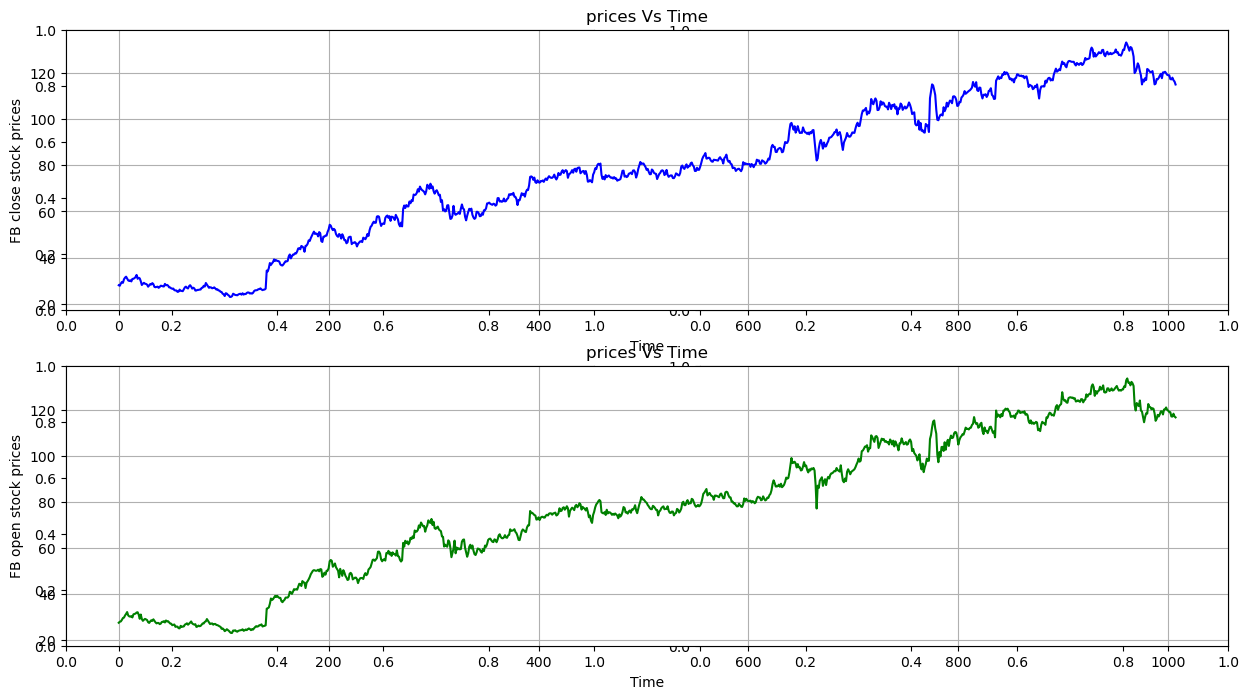

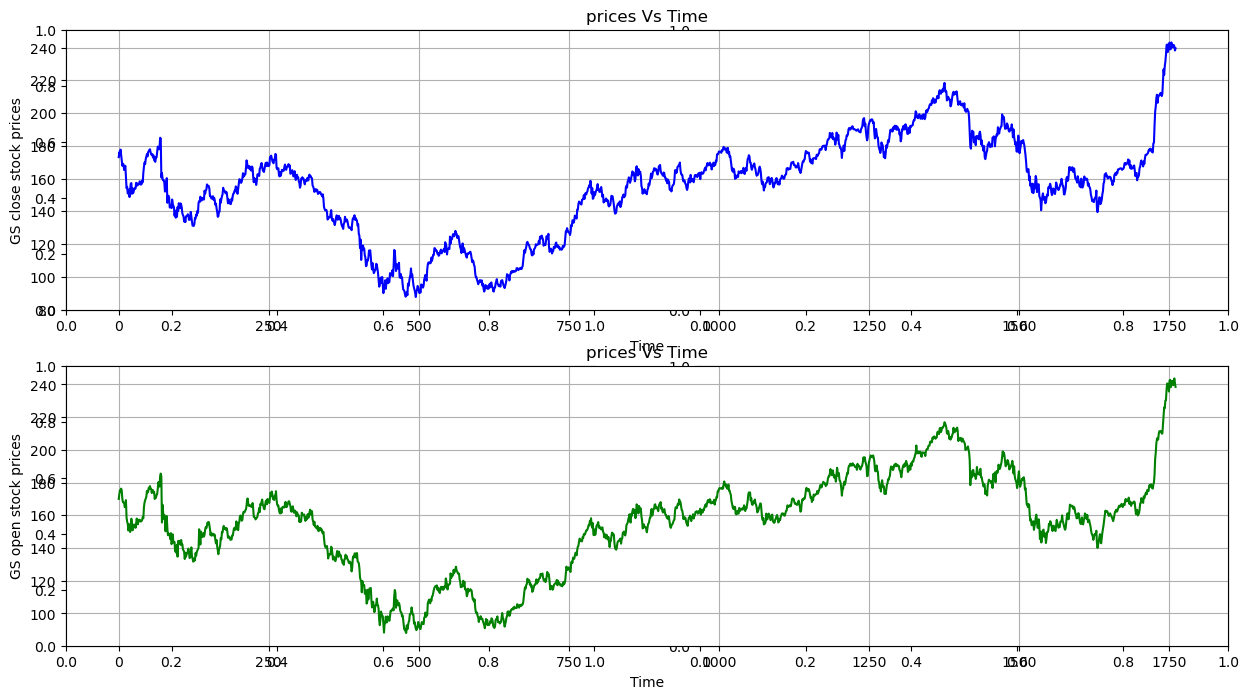

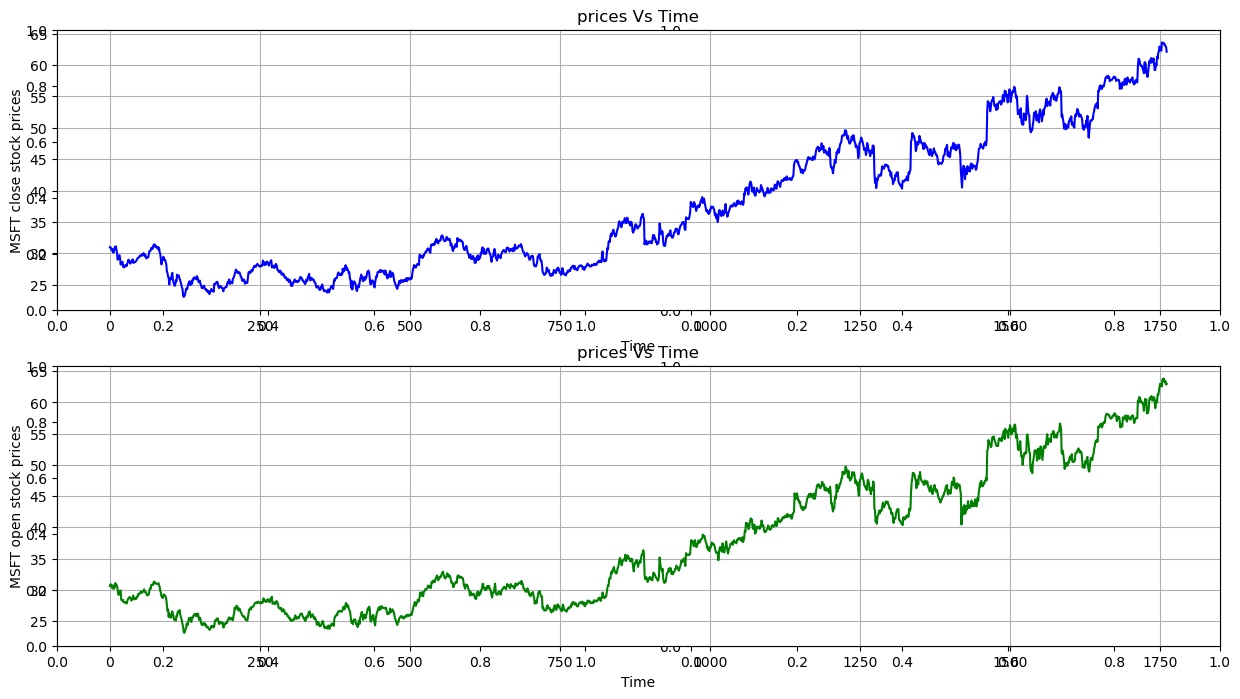

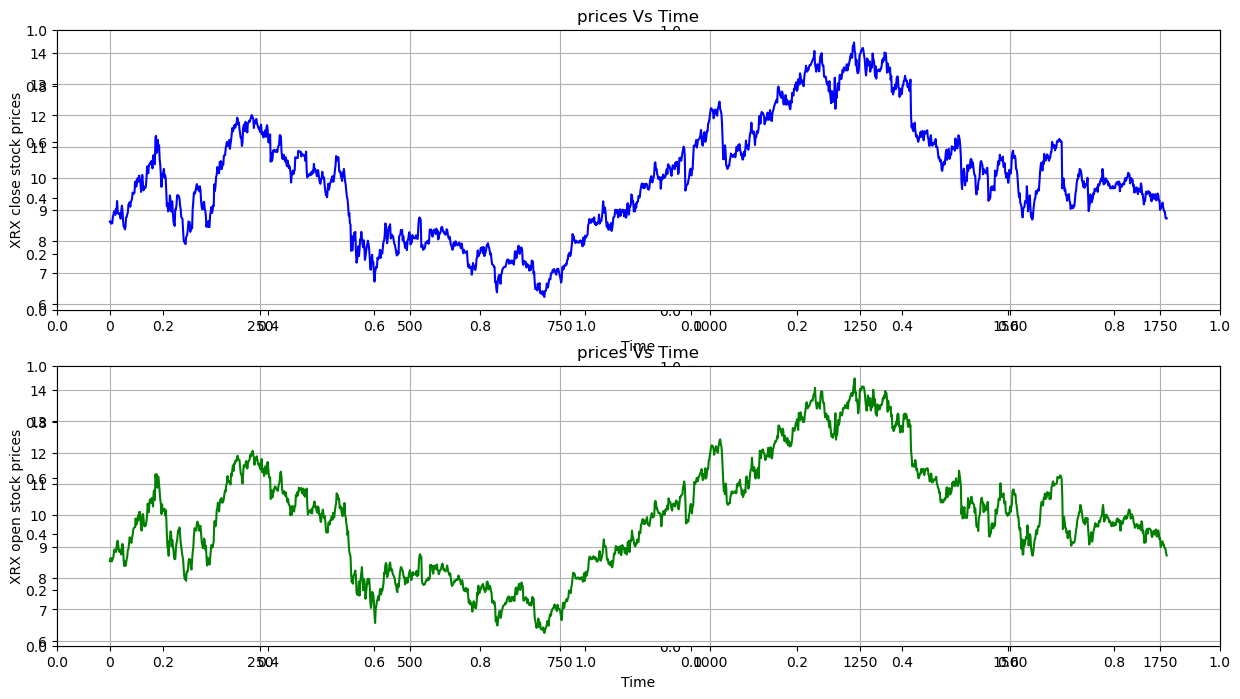

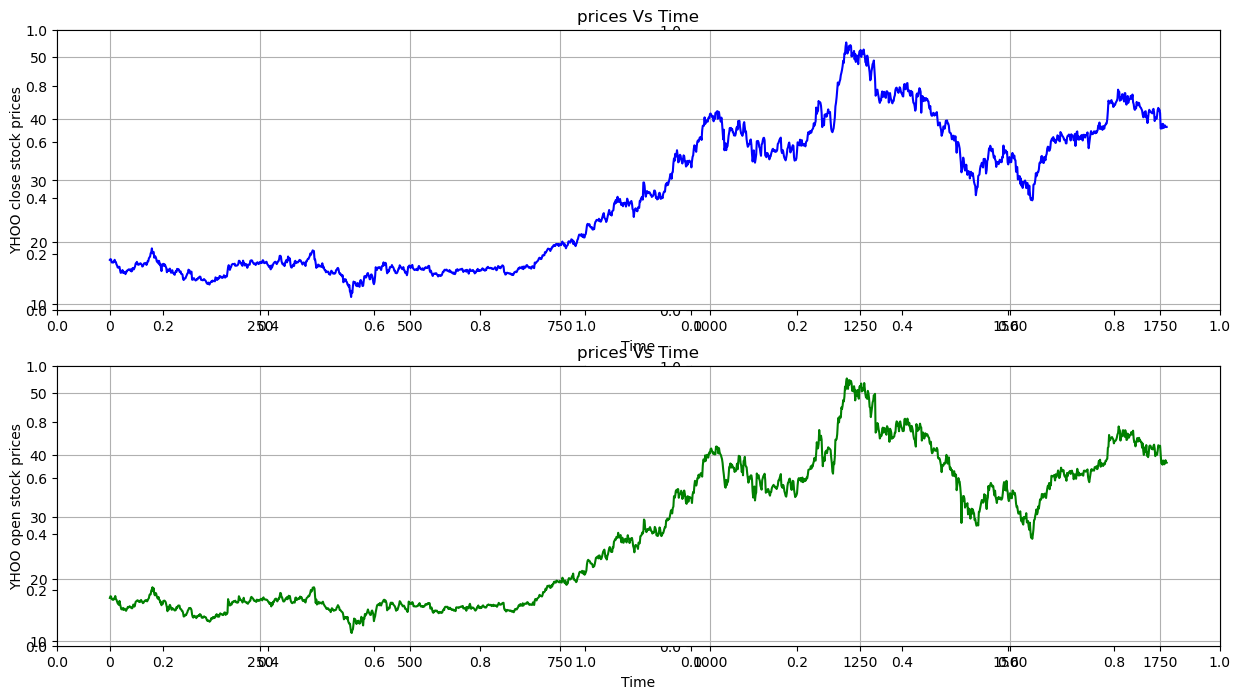

'Plot Summary\nAdobe report\nAs we can see, that close and open started around 38 points and shows an increasing growth with time. The open and close graph closes at a very high position (around 105) compared to the start.\n\nFacebook report\nAs the graph shows, open and close started around 30 points. And from there, it shows a bit downfall time 150. But then it shows a massive uprise and ends at the120 points for both open and close.\n\nGoldman Sachs\nAs we see in graphs of open and close stocks, we see that Goldman has taken many up and downs almost the whole journey. It starts from high points than others around 175 points and faced major downfall but at last, it reached higher to 240 points.\n\nMicrosoft\nAs the graphs explain open and close stock for Microsoft started from 30 points. And from there they show total elevation to 65 points. It is a great option for investment\n\nXerox\nAs the graphs suggest for Xerox, it started from very low points of 9 and from there it struggled 

In [23]:
#Creating a function to plot Graphs for selected companies  opening stock and closing stock against time 
def plotter(code):
    # Function used to create graphs for 6 companies 
    global closing_stock ,opening_stock
    #creating plot of all 6 company for opening and closing stock  total 12 graphs
    # Below statement create 2X2 empty chart 
    f, axs = plt.subplots(2,2,figsize=(15,8))
    # total 12 graphs
    # creating plot opening prize of particular company
    plt.subplot(212)
    #taking name of the company as code, get all records related to one company
    company = df[df['symbol']==code]
    #taking the values of one company and taking its open column values to 1D array
    company = company.open.values.astype('float32')
    #reshaping the open stock value from 1D  to 2D .
    company = company.reshape(-1, 1)
    # putting the value of company in opening_stock 
    opening_stock = company
    # plotting the data with green graph between "Time" and "prices vs time"
    
    plt.grid(True)# enalbling the grid in graph
    plt.xlabel('Time') # setting X axis as time
    # setting Y axis as company name + open stock prices
    plt.ylabel(code + " open stock prices") 
    plt.title('prices Vs Time') # setting title
    plt.plot(company , 'g') # calling the graph with green graph line
    
    # creating plot closing prize of particular company
    plt.subplot(211)
    #taking name of the company as code
    company_close = df[df['symbol']==code]
    #taking the values of one company and taking its close column values
    company_close = company_close.close.values.astype('float32')
    #reshaping the open column value in 1D and calling it closing_stock
   # -1 for unknown dimension
    company_close = company_close.reshape(-1, 1)
    # putting company_close value in closing_stock 
    closing_stock = company_close
    # plotting the data graph between "Time" and "prices vs time"
    plt.xlabel('Time') # setting x axis as time
    plt.ylabel(code + " close stock prices")# setting y axis as company name + open stock prices
    plt.title('prices Vs Time') # setting title as price vs time
    plt.grid(True) # enabling the grid in graph
    plt.plot(company_close , 'b') #creating the data graph in blue graph line
    plt.show() # calling the graph

#Calling the graphs through the function    
for i in comp_plot:
    plotter(i)

'''Plot Summary
Adobe report
As we can see, that close and open started around 38 points and shows an increasing growth with time. The open and close graph closes at a very high position (around 105) compared to the start.

Facebook report
As the graph shows, open and close started around 30 points. And from there, it shows a bit downfall time 150. But then it shows a massive uprise and ends at the120 points for both open and close.

Goldman Sachs
As we see in graphs of open and close stocks, we see that Goldman has taken many up and downs almost the whole journey. It starts from high points than others around 175 points and faced major downfall but at last, it reached higher to 240 points.

Microsoft
As the graphs explain open and close stock for Microsoft started from 30 points. And from there they show total elevation to 65 points. It is a great option for investment

Xerox
As the graphs suggest for Xerox, it started from very low points of 9 and from there it struggled to progress. There was a major fall after some time and in the end, the stock prices are still nearly the same.
Yahoo
As we see in the graphs, Yahoo prices remained the same for some time. But then they show effective progress. And at the end, they go to around 40 points.'''


In [24]:
#Extract closing stock   of one company, here YHOO
stocks= np.array (df[df.symbol.isin (['YHOO'])].close)
print(stocks)

[17.1      17.23     17.17     ... 38.73     38.639999 38.669998]


In [25]:
#Display Shape 
display (stocks.shape)

(1762,)

In [26]:
#Convert stock to 2D array     
stocks = stocks.reshape(len(stocks) , 1)
print (stocks.shape)
print(stocks)

(1762, 1)
[[17.1     ]
 [17.23    ]
 [17.17    ]
 ...
 [38.73    ]
 [38.639999]
 [38.669998]]


In [27]:
#Min Max Scaler      
#Feature scaling the vector for better model performance.
from sklearn.preprocessing import MinMaxScaler
#scaling features between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1)) 
stocks = scaler.fit_transform(stocks) 
display (stocks)

array([[0.14559109],
       [0.14874031],
       [0.14728683],
       ...,
       [0.66957366],
       [0.6673934 ],
       [0.66812012]])

In [28]:
#Train Test Split (80 % Training and 20 % Test Data)     
#otal Number of Records
print (stocks.shape) 
# 80 % Training record count   
train = int(len(stocks) * 0.80)
print (train)

# 20 % record count    (Total – 80%)
test = len(stocks) - train 
print (test)

(1762, 1)
1409
353


In [29]:
#Training Data
#divinding the values of stocks data to train from 0 to 1409 i.e 80% data
train = stocks[0:train]
display (train.shape)
print(train)

(1409, 1)

[[0.14559109]
 [0.14874031]
 [0.14728683]
 ...
 [0.63372095]
 [0.61458332]
 [0.61967051]]


In [30]:
#Test Data
#divinding the values of stocks data to test from train ending to stock data ending i.e rest 20% data
test = stocks[len(train) : ]
display(test.shape)
display (test)

(353, 1)

array([[0.63129851],
       [0.60416666],
       [0.56686053],
       [0.6017442 ],
       [0.60925394],
       [0.60586237],
       [0.59593022],
       [0.58381782],
       [0.55741276],
       [0.52906978],
       [0.48982557],
       [0.50024226],
       [0.51913761],
       [0.54748061],
       [0.53415697],
       [0.51235471],
       [0.49685079],
       [0.500969  ],
       [0.51962213],
       [0.49636629],
       [0.47989342],
       [0.4949128 ],
       [0.48594962],
       [0.49273257],
       [0.46584303],
       [0.48328492],
       [0.49200583],
       [0.48062017],
       [0.47601745],
       [0.48643412],
       [0.46778102],
       [0.45179265],
       [0.44210272],
       [0.43701549],
       [0.39995156],
       [0.41593993],
       [0.43168606],
       [0.43168606],
       [0.47529068],
       [0.47868218],
       [0.48134689],
       [0.50339151],
       [0.51550386],
       [0.51913761],
       [0.52737407],
       [0.51477714],
       [0.50872094],
       [0.542

In [31]:
#Function to prepare the data, use two previous values to predict for third data 

#creating function to create trainX,testX and target(trainY, testY)
def process_data(data , n_features):
    dataX, dataY = [], [] # creating data for dataset and dividing inta X,Y
    for i in range(len(data)-n_features):
        # taking i range from total size- 3 
        a = data[i:(i+n_features), 0]
        # Here a is value of data from i to i+ n_features, ie two values and put it in dataX 
        dataX.append(a) #putting a in dataX
        #here dataY takes the value of data of i + n_features
        dataY.append(data[i + n_features, 0])
        # putting i+ n_features in  dataY
    return np.array(dataX), np.array(dataY)
# returning dataX and dataY in array

In [32]:
#Call the function to prepare training data
#n_features: This is the number of previous period’s data required to do the current prediction. In this case, use two previous records data to predict the current value.
n_features = 2
# Here we create train X, Train Y and test X, Test Y data where trainX, testX has two value is each block

trainX, trainY = process_data(train, n_features)
print(trainX.shape , trainY.shape)

(1407, 2) (1407,)


In [33]:
#Call the function to prepare test data - n_features = 2

testX, testY = process_data(test, n_features)
print (testX.shape , testY.shape)

(351, 2) (351,)


In [34]:
#Call the function to prepare full  data - n_features = 2
stocksX, stocksY = process_data(stocks, n_features)
print (stocksX.shape , stocksY.shape)

(1760, 2) (1760,)


In [35]:
#Display the First 10 Records from Train X 
display (trainX[:10])

array([[0.14559109, 0.14874031],
       [0.14874031, 0.14728683],
       [0.14728683, 0.13590119],
       [0.13590119, 0.13590119],
       [0.13590119, 0.13687016],
       [0.13687016, 0.13541667],
       [0.13541667, 0.14074613],
       [0.14074613, 0.14607561],
       [0.14607561, 0.13880814],
       [0.13880814, 0.13711241]])

In [36]:
#Display the First 10 Records from TrainY
display (trainY[:10])

array([0.14728683, 0.13590119, 0.13590119, 0.13687016, 0.13541667,
       0.14074613, 0.14607561, 0.13880814, 0.13711241, 0.1281492 ])

In [37]:
#Reshape to 3D array to use for LSTM /Deep Learning model 
# reshaping trainX and testX to use in deep learning model
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
display (trainX.shape)

(1407, 1, 2)

In [38]:
#Reshape to 3D array test X 
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])
display (testX.shape)

(351, 1, 2)

In [39]:
#Reshape to 3D array  full data set 
stocksX= stocksX.reshape(stocksX.shape[0] , 1 ,stocksX.shape[1])
display (stocksX.shape)

(1760, 1, 2)

In [40]:
#Import Libraries 
# helps us do mathematical operations
import math 
# for setting layers one by one neural layer in model 
from keras.models import Sequential 
# types of layers
from keras.layers import Dense , BatchNormalization , Dropout , Activation 
# types of RNN
from keras.layers import LSTM , GRU 
#It puts the data in between given range to set data before putting layer
from sklearn.preprocessing import MinMaxScaler 
# In this method the errors in column is squared and then mean is found 
from sklearn.metrics import mean_squared_error 
# Optimizers used
from keras.optimizers import Adam , SGD , RMSprop
# Optimizers used
# If Keras Optimizers Gives error use from Tensor Flow 
from tensorflow.keras.optimizers import Adam,SGD , RMSprop

'''keras
Keras contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing deep neural network code.

RNN
recurrent neural network processes sequences — whether daily stock prices, sentences, or sensor measurements — one element at a time while retaining a memory (called a state) of what has come previously in the sequence.Recurrent means the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements.

Optimizers
Optimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in computing the target values(Y) from the set of predictors(X) used in the model.'''


'keras\nKeras contains numerous implementations of commonly used neural-network building blocks such as layers, objectives, activation functions, optimizers, and a host of tools to make working with image and text data easier to simplify the coding necessary for writing deep neural network code.\n\nRNN\nrecurrent neural network processes sequences — whether daily stock prices, sentences, or sensor measurements — one element at a time while retaining a memory (called a state) of what has come previously in the sequence.Recurrent means the output at the current time step becomes the input to the next time step. At each element of the sequence, the model considers not just the current input, but what it remembers about the preceding elements.\n\nOptimizers\nOptimization algorithms helps us to minimize (or maximize) an Objective function (another name for Error function) E(x) which is simply a mathematical function dependent on the Model’s internal learnable parameters which are used in co

In [41]:
#Create Check Points 

#Checkpointing the model when required and using other call-backs.
filepath="stock_weights1.keras"
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint
# ReduceLROnPlateau- This reduce the learning rate when the matrix stop improving or  too close to reduce overfitting
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, min_delta =0.0001, patience=1, verbose=1)
#This check point will stop processing, if the model is not improving.
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')


'''Callbacks
A callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.

ReduceLROnPlateau
Reduce learning rate when a metric has stopped improving.Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.

ModelCheckpoint
Save the model after every epoch.filepath can contain named formatting options, which will be filled with the values of epoch and keys in logs (passed in on_epoch_end).'''


"Callbacks\nA callback is a set of functions to be applied at given stages of the training procedure. You can use callbacks to get a view on internal states and statistics of the model during training. You can pass a list of callbacks (as the keyword argument callbacks) to the .fit() method of the Sequential or Model classes. The relevant methods of the callbacks will then be called at each stage of the training.\n\nReduceLROnPlateau\nReduce learning rate when a metric has stopped improving.Models often benefit from reducing the learning rate by a factor of 2-10 once learning stagnates. This callback monitors a quantity and if no improvement is seen for a 'patience' number of epochs, the learning rate is reduced.\n\nModelCheckpoint\nSave the model after every epoch.filepath can contain named formatting options, which will be filled with the values of epoch and keys in logs (passed in on_epoch_end)."

In [42]:
#Create the model – Fully connected Layer 
# creating model for training data using sequential to give series wise output between layers
model = Sequential()
# GRU or Gated Recurrent Unit used for matrix manipulation within Recurrent layer
#This is the input Layer 
model.add(GRU(256 , input_shape = (1 , n_features) , return_sequences=True))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Long Short Term Memory is a type of RNN specially used for time series problems
model.add(LSTM(256))
#dropout is used to remove overfitting data on each layer of neural network
model.add(Dropout(0.4))
#Dense layer are fully connected neural networks 
model.add(Dense(64 ,  activation = 'relu'))
#This is the output Layer, Output is only one neuron 
model.add(Dense(1))
#for getting the details of our models
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 256)         │       199,680 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 741,505 (2.83 MB)

 Trainable params: 741,505 (2.83 MB)

 Non-trainable params: 0 (0.00 B)

None


In [43]:
#Compile the Model 
# Selecting the loss measurement metrics and optimizer for our model, to find out mean square error
model.compile(loss='mean_squared_error', metrics = ['mean_squared_error'])

In [44]:
#Fit the Model 
# fitting the data i.e training the trainX, to relate to trainY
# epochs is the times each data in send to fit
# batch size is the size of information send at a time
# validation_data is the validation or data used for testing 
history = model.fit(trainX, trainY, epochs=10 , batch_size = 128 , 
          callbacks = [checkpoint , lr_reduce] , validation_data = (testX,testY))  

Epoch 1/10
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.1196 - mean_squared_error: 0.1196
Epoch 1: val_loss improved from -inf to 0.00804, saving model to stock_weights1.keras
11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - loss: 0.1112 - mean_squared_error: 0.1112 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - learning_rate: 0.0010
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0128 - mean_squared_error: 0.0128
Epoch 2: val_loss did not improve from 0.00804
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.0125 - mean_squared_error: 0.0125 - val_loss: 5.5910e-04 - val_mean_squared_error: 5.5910e-04 - learning_rate: 0.0010
Epoch 3/10
10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 3: val_loss did not improve from 0.00804

Epoch 3: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.0023 - mean_squared_error: 0.0023 - val_loss: 5.3527e-04 - val_mean_squared_e

In [45]:
#Predict the value for testX, display top 10 records 

test_pred = model.predict(testX)
display (test_pred [:10])

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step


array([[0.6102706 ],
       [0.5786531 ],
       [0.57757133],
       [0.598329  ],
       [0.6003324 ],
       [0.5937871 ],
       [0.58296925],
       [0.5640486 ],
       [0.53717446],
       [0.50397605]], dtype=float32)

In [46]:
#Inverse Transform the data – Convert the data to Original form
test_pred = scaler.inverse_transform(test_pred)
display (test_pred [:10])

array([[36.28197 ],
       [34.9768  ],
       [34.932144],
       [35.78902 ],
       [35.87172 ],
       [35.60153 ],
       [35.15497 ],
       [34.373924],
       [33.26456 ],
       [31.89413 ]], dtype=float32)

In [47]:
#Reshape and Display Original Data 
testY = testY.reshape(testY.shape[0] , 1)
#Converting reshaped list in 1D array so that it will be efficient in plotting
testY = scaler.inverse_transform(testY)
# taking testY from 1 to 10
display (testY[:10])

array([[34.490002],
       [35.93    ],
       [36.240002],
       [36.099998],
       [35.689999],
       [35.189999],
       [34.099998],
       [32.93    ],
       [31.309999],
       [31.74    ]])

In [48]:
#Display the accuracy 
from sklearn.metrics import r2_score
r2_score(testY,test_pred)

0.9664001382409018

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


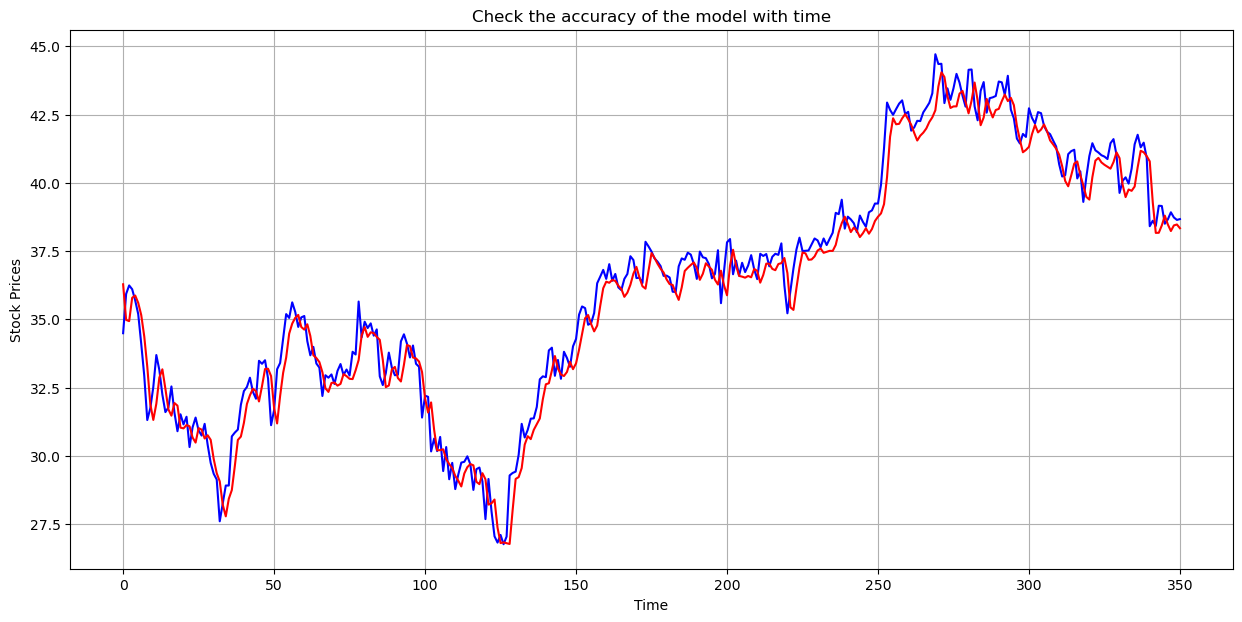

In [49]:
#Plot the Graph Actual and Predicted Data 
# Ploting the graph of stock prices with time
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
# testY is the blue line
plt.plot(testY , 'b')
# pred is the red line
plt.plot(test_pred , 'r')
# Setting x axis as time
plt.xlabel('Time')
# Setting y axis as stock prices
plt.ylabel('Stock Prices')
# setting title 
plt.title('Check the accuracy of the model with time')
# enabling grids in graph 
plt.grid(True)
# it call the graph with labels, titles, lines
plt.show()

In [50]:
#Prediction Training Data and Check Accuracy 
train_pred = model.predict(trainX)
train_pred = scaler.inverse_transform(train_pred)
trainY = trainY.reshape(trainY.shape[0] , 1)
trainY = scaler.inverse_transform(trainY)
print ('Display Accuracy Training Data')
display (r2_score(trainY,train_pred))

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Display Accuracy Training Data


0.9970631661375404

Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices


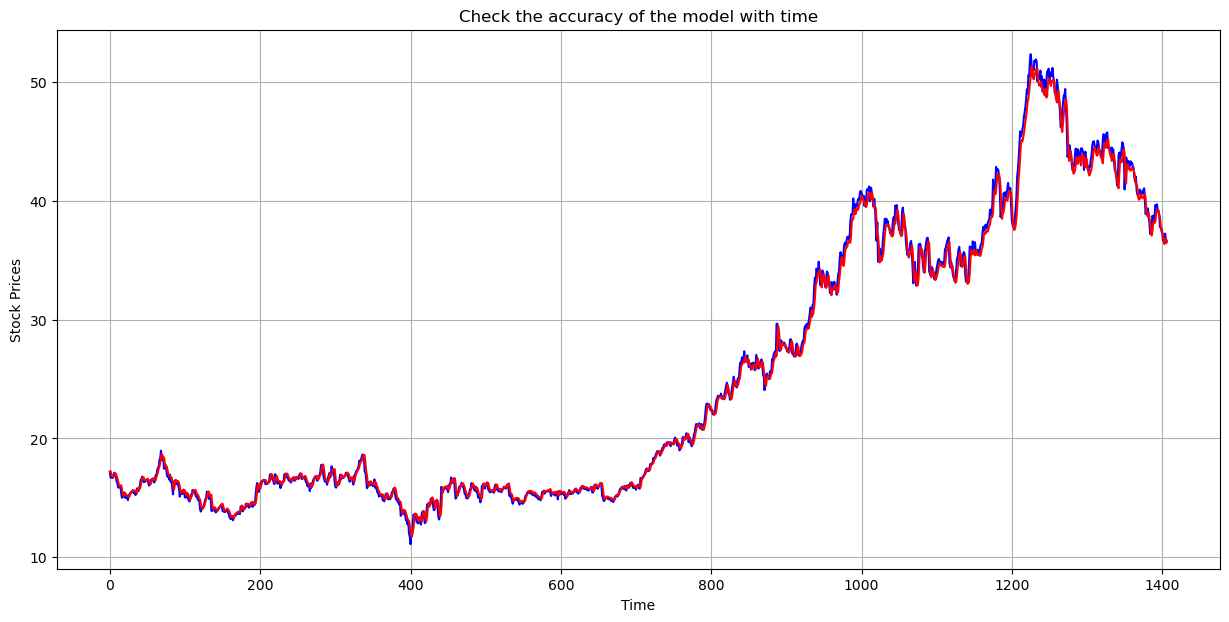

In [51]:
#Plot the Graph 

# Ploting the graph of stock prices with time - Training Data
print("Red - Predicted Stock Prices  ,  Blue - Actual Stock Prices")
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(trainY  , 'b')
plt.plot(train_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [52]:
#Prediction Full Data 

stocks_pred = model.predict(stocksX)
stocks_pred = scaler.inverse_transform(stocks_pred)
stocksY = stocksY.reshape(stocksY.shape[0] , 1)
stocksY = scaler.inverse_transform(stocksY)
print ('Display Accuracy Training Data')
display (r2_score(stocksY,stocks_pred))

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Display Accuracy Training Data


0.9966058719748673

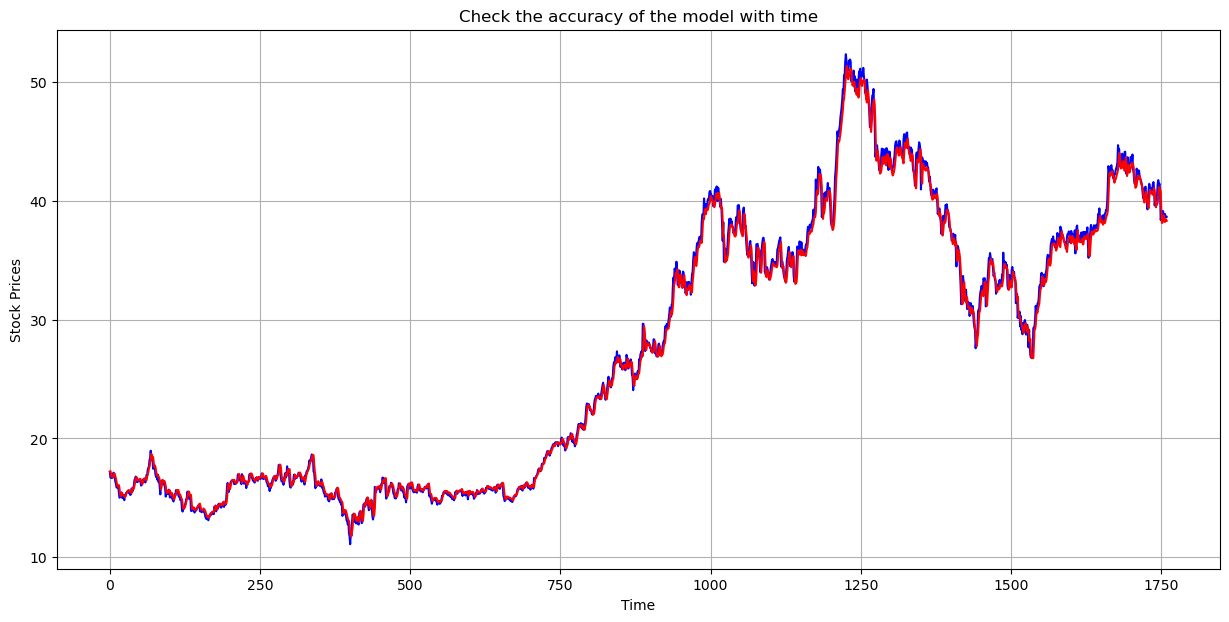

In [53]:
#Plot the Graph 
plt.rcParams["figure.figsize"] = (15,7)
plt.plot(stocksY  , 'b')
plt.plot(stocks_pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the accuracy of the model with time')
plt.grid(True)
plt.show()

In [54]:
#Concat original and prediction data  

# Extract the data related to company - YHOO
results= df[df.symbol.isin (['YHOO'])]
# Update the data frame starting with 2nd records , since first prediction is for 2nd record
results= results [2:]
# Reset the index 0, 1,2 etc
results = results.reset_index(drop=True)
# Convert Predicted Value to Data Frame
df_stocks_pred= pd.DataFrame(stocks_pred, columns = ['Close_Prediction'])
# Concat Original and prediction data
results= pd.concat([results,df_stocks_pred],axis =1)
results.to_csv('results.csv')
display(results)

,date,symbol,open,close,low,high,volume,Close_Prediction
0,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0,17.218830
1,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0,17.252855
2,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0,16.993528
3,2010-01-11,YHOO,16.770000,16.740000,16.480000,16.830000,16181900.0,16.764362
4,2010-01-12,YHOO,16.650000,16.680000,16.600000,16.860001,15672400.0,16.783937
...,...,...,...,...,...,...,...,...
1755,2016-12-23,YHOO,38.459999,38.660000,38.369999,38.810001,3840100.0,38.471798
1756,2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0,38.233208
1757,2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0,38.438961
1758,2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0,38.472527
